In [67]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sn
from random import uniform
from google.colab import files
import io

uploaded = files.upload()
dataset = pd.read_csv(io.BytesIO(uploaded['Real estate.csv']), delimiter=',')

dataset.head()

dataset.drop(['No'], axis=1)

Saving Real estate.csv to Real estate (3).csv


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: Y house price of unit area, dtype: float64


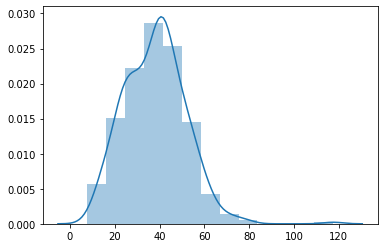

In [68]:
y = dataset['Y house price of unit area'].values # target vector
print(dataset['Y house price of unit area'].describe())
sn.distplot(y, bins = 13)
plt.show()

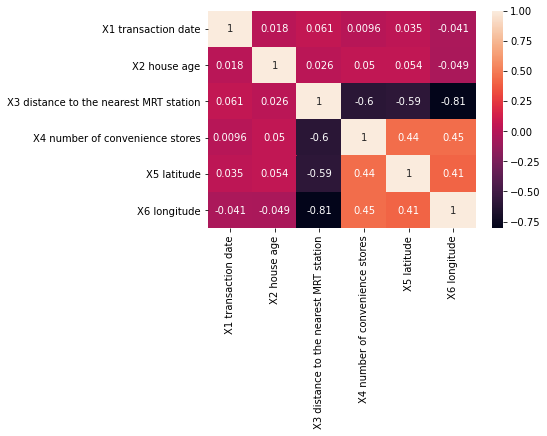

In [69]:
df = pd.DataFrame(dataset,columns=['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']) # regressor matrix
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True) # visualize the correlation matrix using a heatmap

In [70]:
X = dataset[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
X2 = sm.add_constant(X) # augmented regressor matrix
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['Predictor'] = X2.columns
vif = vif.drop(0)
vif

,VIF Factor,Predictor
1,1.014674,X1 transaction date
2,1.014287,X2 house age
3,4.323019,X3 distance to the nearest MRT station
4,1.617038,X4 number of convenience stores
5,1.610234,X5 latitude
6,2.926302,X6 longitude


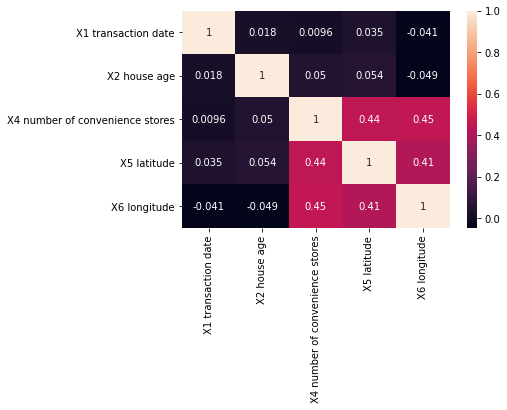

In [71]:
df = pd.DataFrame(dataset,columns=['X1 transaction date', 'X2 house age', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']) # regressor matrix
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True) # visualize the correlation matrix using a heatmap

In [72]:
X = dataset[['X1 transaction date', 'X2 house age', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
X_aug = sm.add_constant(X) # augmented regressor matrix with a column of ones inserted at the front
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X_aug.values, i) for i in range(X_aug.shape[1])]
vif['Predictor'] = X_aug.columns
vif = vif.drop(0)
vif

,VIF Factor,Predictor
1,1.005277,X1 transaction date
2,1.012527,X2 house age
3,1.398292,X4 number of convenience stores
4,1.349140,X5 latitude
5,1.365232,X6 longitude


In [73]:
regressor = linear_model.LinearRegression()
regressor.fit(X, y)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
# print the calculated coefficients as well as the intercept
print('Intercept                      %.6f' %(regressor.intercept_))
print(coeff_df)

Intercept                      -42310.207230
                                 Coefficient
X1 transaction date                 4.209764
X2 house age                       -0.279726
X4 number of convenience stores     1.565796
X5 latitude                       337.629436
X6 longitude                      209.338154


    Actual  Predicted
0     37.9  48.404279
1     42.2  49.290901
2     47.3  50.890731
3     54.8  50.541321
4     43.1  47.018079
5     32.1  30.828825
6     40.3  39.923115
7     46.7  47.081491
8     18.8  14.384292
9     22.1  32.889071
10    41.4  29.658713
11    58.1  53.456919
12    39.3  39.269362
13    23.8  27.573710
14    34.3  48.325797
15    50.5  38.696363
16    70.1  51.532243
17    37.4  33.168931
18    42.3  47.268804
19    47.7  46.197155
20    29.3  34.528204
21    51.6  50.308416
22    24.6  30.417507
23    47.9  49.014246
24    38.8  33.751416
25    27.0  29.968922
26    56.2  47.656063
27    33.6  38.653993
28    47.0  41.601329
29    57.1  47.160289
30    22.1  15.896112
31    25.0  42.328283
32    34.2  27.555088
33    49.3  46.873734
34    55.1  48.514296
35    27.3  46.313934
36    22.9  28.890080
37    25.3  32.225209
38    47.7  46.930124
39    46.2  46.404920
40    15.9  16.628513
41    18.2  18.236063
42    34.7  34.247509
43    34.1  42.865920
44    53.9

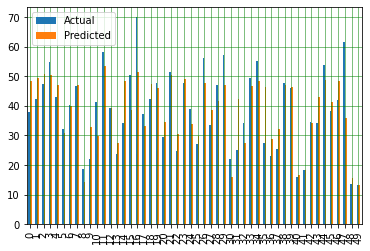

In [74]:
y_hat = regressor.predict(X) # predicted values
df_comparison = pd.DataFrame({'Actual': y, 'Predicted': y_hat}) # put the actual and predicted values together
df_comparison = df_comparison.head(50) # show top 50 rows of this data frame
print(df_comparison)
df_comparison.plot(kind = 'bar') # visualize the comparison
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')

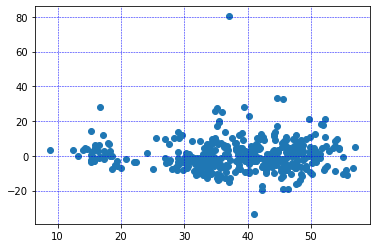

In [75]:
epsilon_hat = y - y_hat # residuals
plt.grid(color = 'b', linestyle= '--' , linewidth = 0.5)
plt.scatter(y_hat, epsilon_hat) # scatter plot

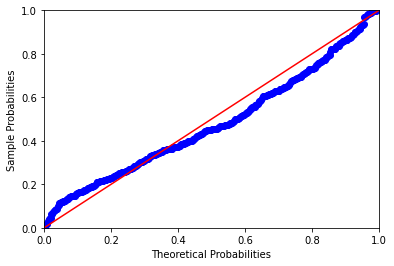

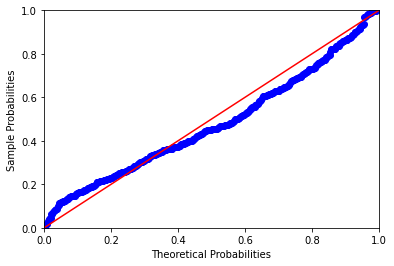

In [76]:
pp = sm.ProbPlot(epsilon_hat, fit=True)
pp.ppplot(line='45') # normal probability plot

In [82]:
random = []
# generate random inputs
for i in range(X.shape[1]):
  random.append(uniform(X.iloc[:, i].min(), X.iloc[:, i].max()))
# print the random inputs generated
print('random input:', random)
random.insert(0, 1) # insert 1 at the front
X_aug = sm.add_constant(X) # insert 1 at the front
est = sm.OLS(y, X_aug).fit()
prediction = est.get_prediction(np.reshape(random, (1, 6)))
pd.set_option('display.max_columns', None)
print(prediction.summary_frame(alpha = 0.05))

random input: [2013.3002540225928, 19.80124894778612, 2.2810358454108703, 24.979226201571294, 121.53197772366114]
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  38.346671  0.809233      36.755885      39.937457     20.070918   

   obs_ci_upper  
0     56.622423  


In [83]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     96.68
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           5.12e-67
Time:                        23:11:27   Log-Likelihood:                -1505.9
No. Observations:                 414   AIC:                             3024.
Df Residuals:                     408   BIC:                             3048.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [84]:
X_ = dataset[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
X_aug_ = sm.add_constant(X_) # augmented regressor matrix with a column of ones inserted at the front
min_r_cv = 0
# calculate the initial risk estimator with all predictors included
for i in range(X_.shape[0]):
  X_cv = X_aug_.drop(X_aug_.index[i])
  X_cv.reset_index(inplace=True)
  X_cv = X_cv.drop('index', axis=1)
  y_cv = np.delete(y, i)
  est_cv = sm.OLS(y_cv, X_cv).fit()
  prediction_cv = est_cv.get_prediction(X_aug_.iloc[[i]]).predicted_mean
  min_r_cv += (y[i] - prediction_cv)**2
print('original risk estimator:', min_r_cv)

variables = X_.shape[1]
min_index = -1
# keep deleting a predictor until we can't improve the model anymore
while (min_index != 0):
  min_index = 0
  # calculate the risk estimator when the j-th predictor is removed
  for j in range(1, variables + 1):
    r_cv = 0
    for i in range(X_.shape[0]):
      X_cv = X_aug_.drop(X_aug_.index[i]) # remove the i-th data point
      X_cv.reset_index(inplace = True)
      X_cv = X_cv.drop('index', axis = 1)
      X_cv.drop(X_cv.columns[[j]], axis=1, inplace=True) # remove the j-th column
      y_cv = np.delete(y, i) # remove the i-th data point
      # refit the model and make the prediction
      est_cv = sm.OLS(y_cv, X_cv).fit()
      X_aug_copy = X_aug_.iloc[[i]].copy()
      X_aug_copy.drop(X_aug_copy.columns[[j]], axis=1, inplace=True)
      prediction_cv = est_cv.get_prediction(X_aug_copy).predicted_mean
      # the risk estimator is calculated as the sum of the squared differences between each removed point and the prediction for this point
      r_cv += (y[i] - prediction_cv)**2
    # update the optimal predictor to drop if the risk estimator becomes lower
    if (r_cv < min_r_cv):
      min_index = j
      min_r_cv = r_cv
  # update the regressor matrix and the number of variables if deleting a predictor leads to a better model
  if (min_index != 0):
    X_aug_.drop(X_aug_.columns[[min_index]], axis=1, inplace=True)
    variables -= 1
print('improved risk estimator:', min_r_cv)
print('remaining predictors:', X_aug_.columns.values)

original risk estimator: [33075.17492263]
improved risk estimator: [32951.59783497]
remaining predictors: ['const' 'X1 transaction date' 'X2 house age'
 'X3 distance to the nearest MRT station'
 'X4 number of convenience stores' 'X5 latitude']


In [85]:
est_ = sm.OLS(y, X_aug_).fit()
print(est_.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     113.8
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           4.47e-75
Time:                        23:12:05   Log-Likelihood:                -1487.0
No. Observations:                 414   AIC:                             2986.
Df Residuals:                     408   BIC:                             3010.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [0]:
X_std = StandardScaler().fit_transform(X_)

(0.00707945784384138,
 14.12537544622754,
 -6.055023647908607,
 3.7774646433491075)

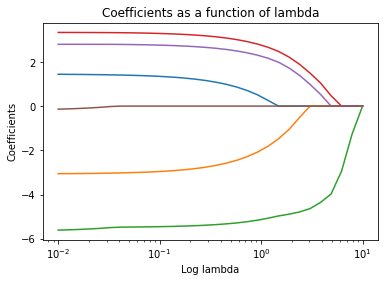

In [87]:
coefs = []
alphas = np.logspace(-2, 1, 30) # the range of the parameter
for a in alphas:
    l = linear_model.Lasso(alpha=a, fit_intercept=False)
    l.fit(X_std, y)
    coefs.append(l.coef_)
# plot log lambda on x-axis and the corresponding values of coefficients on y-axis
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('Log lambda')
plt.ylabel('Coefficients')
plt.title('Coefficients as a function of lambda')
plt.axis('tight')

In [88]:
parameters_lasso = [{'alpha': alphas}]
cv_lasso = GridSearchCV(linear_model.Lasso(), parameters_lasso, scoring = 'neg_mean_squared_error')
cv_lasso.fit(X_std, y)
scores_lasso = cv_lasso.cv_results_['mean_test_score'] # the scores are negative
scores_lasso = np.negative(scores_lasso) # reverse the sign of the score
scores_std_lasso = cv_lasso.cv_results_['std_test_score'] # standard deviation
# print the optimal values
print('best score:', np.negative(cv_lasso.best_score_))
print('lambda:', cv_lasso.best_params_.get('alpha'))

best score: 78.31608978858921
lambda: 0.05298316906283707


Text(0.5, 1.0, 'CV score as a function of lambda')

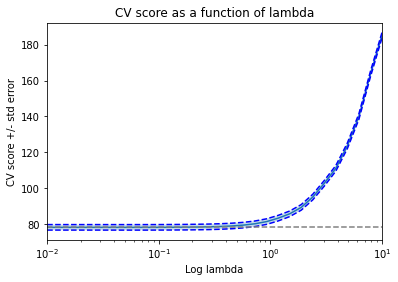

In [89]:
# plot the cross validation score against log lambda
fig_lasso = plt.figure()
plt.semilogx(alphas, scores_lasso)
std_error_lasso = scores_std_lasso / np.sqrt(X_.shape[0])
# shade the region within 1 std err
plt.semilogx(alphas, scores_lasso + std_error_lasso, 'b--')
plt.semilogx(alphas, scores_lasso - std_error_lasso, 'b--')
plt.fill_between(alphas, scores_lasso + std_error_lasso, scores_lasso - std_error_lasso, alpha = 0.25)
plt.ylabel('CV score +/- std error')
plt.xlabel('Log lambda')
plt.axhline(np.min(scores_lasso), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.title('CV score as a function of lambda')

In [91]:
# print the standardized coefficients
print('Lasso Results:')
print('(Standardized)')
lasso = linear_model.Lasso(alpha = cv_lasso.best_params_.get('alpha'))
lasso.fit(X_std, y)
lasso_df = pd.DataFrame(lasso.coef_, X_.columns, columns=['Coefficient'])
print('Intercept                                 %.6f' %(lasso.intercept_))
print(lasso_df)

Lasso Results:
(Standardized)
Intercept                                 37.980193
                                        Coefficient
X1 transaction date                        1.392322
X2 house age                              -3.008603
X3 distance to the nearest MRT station    -5.468975
X4 number of convenience stores            3.311749
X5 latitude                                2.782846
X6 longitude                              -0.000000


In [92]:
# back-convert for ease of interpretation
# beta_real = beta_std / std err
# intercept_real = intercept_std - sum of (mean * beta_std / stderr)
print('(Real)')
lasso_real = lasso_df.copy()
intercept_real = lasso.intercept_
count_lasso = lasso_real.shape[0]
for i in range(lasso_real.shape[0]):
  # decrement the total number of predictors if the coefficient is reduced to zero
  if lasso_real.iloc[i, 0] == 0:
    count_lasso -= 1
  lasso_real.iloc[i, 0] /= np.std(X_.iloc[:, i])
  intercept_real -= (lasso_real.iloc[i, 0] * np.mean(X_.iloc[:, i]))
print('Intercept                             %.6f' %(intercept_real))
print(lasso_real)

(Real)
Intercept                             -15515.768488
                                        Coefficient
X1 transaction date                        4.943862
X2 house age                              -0.264406
X3 distance to the nearest MRT station    -0.004338
X4 number of convenience stores            1.125679
X5 latitude                              224.509957
X6 longitude                              -0.000000


Ridge Results:


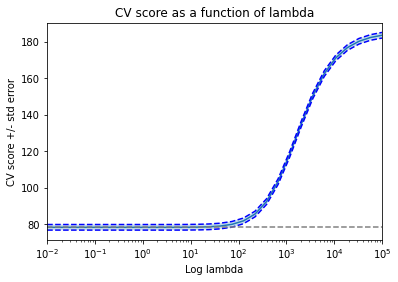

best score: 78.32898324034278
lambda: 2.592943797404667
(Standardized)
Intercept                                 37.980193
                                        Coefficient
X1 transaction date                        1.436194
X2 house age                              -3.048938
X3 distance to the nearest MRT station    -5.543872
X4 number of convenience stores            3.336385
X5 latitude                                2.806742
X6 longitude                              -0.104249

(Real)
Intercept                             -15050.879394
                                        Coefficient
X1 transaction date                        5.099639
X2 house age                              -0.267951
X3 distance to the nearest MRT station    -0.004398
X4 number of convenience stores            1.134053
X5 latitude                              226.437833
X6 longitude                              -6.800912


In [93]:
print('Ridge Results:')
alphas_ridge = np.logspace(-2, 5, 30) # the range of the parameter
parameters_ridge = [{'alpha': alphas_ridge}]
cv_ridge = GridSearchCV(linear_model.Ridge(), parameters_ridge, scoring = 'neg_mean_squared_error')
cv_ridge.fit(X_std, y)
scores_ridge = cv_ridge.cv_results_['mean_test_score'] # the scores are negative
scores_ridge = np.negative(scores_ridge) # reverse the sign of the score
scores_std_ridge = cv_ridge.cv_results_['std_test_score'] # standard deviation

# plot the cross validation score against log lambda
fig_ridge = plt.figure()
plt.semilogx(alphas_ridge, scores_ridge)
std_error_ridge = scores_std_ridge / np.sqrt(X_.shape[0])
# shade the region within 1 std err
plt.semilogx(alphas_ridge, scores_ridge + std_error_ridge, 'b--')
plt.semilogx(alphas_ridge, scores_ridge - std_error_ridge, 'b--')
plt.fill_between(alphas_ridge, scores_ridge + std_error_ridge, scores_ridge - std_error_ridge, alpha = 0.25)
plt.ylabel('CV score +/- std error')
plt.xlabel('Log lambda')
plt.axhline(np.min(scores_ridge), linestyle='--', color='.5')
plt.xlim([alphas_ridge[0], alphas_ridge[-1]])
plt.title('CV score as a function of lambda')
plt.show()
# print the optimal values
print('best score:', np.negative(cv_ridge.best_score_))
print('lambda:', cv_ridge.best_params_.get('alpha'))

# print the standardized coefficients
print('(Standardized)')
ridge = linear_model.Ridge(alpha = cv_ridge.best_params_.get('alpha'))
ridge.fit(X_std, y)
ridge_df = pd.DataFrame(ridge.coef_, X_.columns, columns=['Coefficient'])
print('Intercept                                 %.6f' %(ridge.intercept_))
print(ridge_df)

# back-convert for ease of interpretation
# beta_real = beta_std / std err
# intercept_real = intercept_std - sum of (mean * beta_std / stderr)
print('\n(Real)')
ridge_real = ridge_df.copy()
ridge_intercept_real = ridge.intercept_
count_ridge = ridge_real.shape[0]
for i in range(count_ridge):
  ridge_real.iloc[i, 0] /= np.std(X_.iloc[:, i])
  ridge_intercept_real -= (ridge_real.iloc[i, 0] * np.mean(X_.iloc[:, i]))
print('Intercept                             %.6f' %(ridge_intercept_real))
print(ridge_real)

Elastic Net Results:


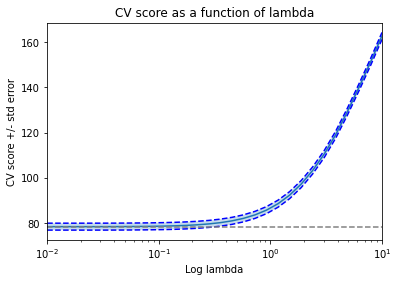

best score: 78.32578208939992
lambda: 0.020433597178569417
(Standardized)
Intercept                                 37.980193
                                        Coefficient
X1 transaction date                        1.417179
X2 house age                              -3.024698
X3 distance to the nearest MRT station    -5.430362
X4 number of convenience stores            3.333001
X5 latitude                                2.811782
X6 longitude                              -0.003293

(Real)
Intercept                             -15725.668991
                                        Coefficient
X1 transaction date                        5.032121
X2 house age                              -0.265821
X3 distance to the nearest MRT station    -0.004308
X4 number of convenience stores            1.132902
X5 latitude                              226.844458
X6 longitude                              -0.214813


In [94]:
print('Elastic Net Results:')
alphas_elastic_net = np.logspace(-2, 1, 30) # the range of the parameter
parameters_elastic_net = [{'alpha': alphas_elastic_net}]
cv_elastic_net = GridSearchCV(linear_model.ElasticNet(), parameters_elastic_net, scoring = 'neg_mean_squared_error')
cv_elastic_net.fit(X_std, y)
scores_elastic_net = cv_elastic_net.cv_results_['mean_test_score'] # the scores are negative
scores_elastic_net = np.negative(scores_elastic_net) # reverse the sign of the score
scores_std_elastic_net = cv_elastic_net.cv_results_['std_test_score'] # standard deviation

# plot the cross validation score against log lambda
fig_elastic_net = plt.figure()
plt.semilogx(alphas_elastic_net, scores_elastic_net)
std_error_elastic_net = scores_std_elastic_net / np.sqrt(X_.shape[0])
# shade the region within 1 std err
plt.semilogx(alphas_elastic_net, scores_elastic_net + std_error_elastic_net, 'b--')
plt.semilogx(alphas_elastic_net, scores_elastic_net - std_error_elastic_net, 'b--')
plt.fill_between(alphas_elastic_net, scores_elastic_net + std_error_elastic_net, scores_elastic_net - std_error_elastic_net, alpha = 0.25)
plt.ylabel('CV score +/- std error')
plt.xlabel('Log lambda')
plt.axhline(np.min(scores_elastic_net), linestyle='--', color='.5')
plt.xlim([alphas_elastic_net[0], alphas_elastic_net[-1]])
plt.title('CV score as a function of lambda')
plt.show()
# print the optimal values
print('best score:', np.negative(cv_elastic_net.best_score_))
print('lambda:', cv_elastic_net.best_params_.get('alpha'))

# print the standardized coefficients
print('(Standardized)')
elastic = linear_model.ElasticNet(alpha = cv_elastic_net.best_params_.get('alpha'))
elastic.fit(X_std, y)
elastic_df = pd.DataFrame(elastic.coef_, X_.columns, columns=['Coefficient'])
print('Intercept                                 %.6f' %(elastic.intercept_))
print(elastic_df)

# back-convert for ease of interpretation
# beta_real = beta_std / std err
# intercept_real = intercept_std - sum of (mean * beta_std / stderr)
print('\n(Real)')
elastic_real = elastic_df.copy()
elastic_intercept_real = elastic.intercept_
count_elastic = elastic_real.shape[0]
for i in range(count_elastic):
  elastic_real.iloc[i, 0] /= np.std(X_.iloc[:, i])
  elastic_intercept_real -= (elastic_real.iloc[i, 0] * np.mean(X_.iloc[:, i]))
print('Intercept                             %.6f' %(elastic_intercept_real))
print(elastic_real)

In [95]:
y_pred_lasso = lasso.predict(X_std) # predictions
r2_lasso = metrics.r2_score(y, y_pred_lasso) # R-squared
adj_r2_lasso = 1 - (1 - r2_lasso) * (X_.shape[0] - 1) / (X_.shape[0] - count_lasso - 1) # adjusted R-squared
print('Lasso adj. R2:', adj_r2_lasso)

y_pred_ridge = ridge.predict(X_std) # predictions
r2_ridge = metrics.r2_score(y, y_pred_ridge) # R-squared
adj_r2_ridge = 1 - (1 - r2_ridge) * (X_.shape[0] - 1) / (X_.shape[0] - count_ridge - 1) # adjusted R-squared
print('Ridge adj. R2:', adj_r2_ridge)

y_pred_elastic = elastic.predict(X_std) # predictions
r2_elastic = metrics.r2_score(y, y_pred_elastic) # R-squared
adj_r2_elastic = 1 - (1 - r2_elastic) * (X_.shape[0] - 1) / (X_.shape[0] - count_elastic - 1) # adjusted R-squared
print('Elastic Net adj. R2:', adj_r2_elastic)

Lasso adj. R2: 0.5771295619995425
Ridge adj. R2: 0.576190574926105
Elastic Net adj. R2: 0.5761109296860583
